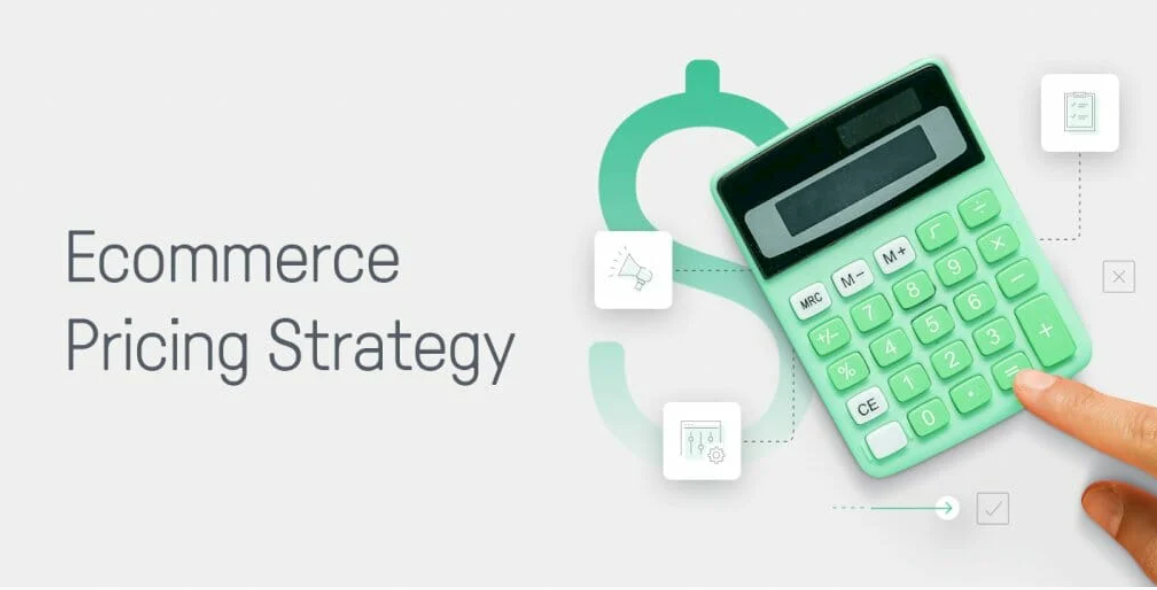

#Context

Optimizing retail prices is like finding the sweet spot between how much you charge for your products and how many people are willing to buy them at that price. The main goal is to set a price that not only brings in the most money but also draws in a good number of customers to purchase your products. This process includes using data and smart pricing strategies to figure out the perfect balance, ensuring most sales and profits while keeping your customers satisfied.

#Know Your Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dfp=pd.read_csv('price_optimsation_dataset.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dfp

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,9750,4.4,57,23,8,1,5,2017,0.649351,12600,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,9750,4.4,61,22,8,1,6,2017,6.493506,12600,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,4.4,123,21,10,1,7,2017,38.311688,12600,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,4.4,90,23,8,1,8,2017,33.766234,12600,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

Observations:

* Dataset contains 676 rows and 30 columns
* No Null Values

#Data Pre-processing

- Check Duplicates
- Check Outliers and Treatment
- Change Data Types of Column if needed
- Data Cleaning

In [ ]:
df=dfp.copy()

In [ ]:
df.duplicated().any()

False

No Duplicates observed

**Check Unique Values for Each Feature and Convert Data type if needed**

In [ ]:
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df[_].value_counts()}')
    print()
    print('-'*120)


Total Unique Values in product_id column are :- 52
Value counts in product_id column are :-
 product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6        7
bed5           5
Name: count

**Converting Data types**

In [ ]:
# Converting column 'month_year' to datetime format
df['month_year']=pd.to_datetime(df['month_year'])

There are a few columns which are categorical in nature and hence will convert them to category data type.

In [ ]:
cat_cols= ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
           'product_score', 'weekday', 'weekend', 'holiday', 'month', 'year', 'volume', 'ps1', 'ps2', 'ps3']

In [ ]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Numeric columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['qty', 'total_price', 'freight_price', 'unit_price', 'customers', 's',
       'comp_1', 'fp1', 'comp_2', 'fp2', 'comp_3', 'fp3', 'lag_price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    category      
 1   product_category_name       676 non-null    category      
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    category      
 8   product_description_lenght  676 non-null    category      
 9   product_photos_qty          676 non-null    category      
 10  product_weight_g            676 non-null    category      
 11  product_score               676 non-null    category      

**Checking Outliers and Treatment**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

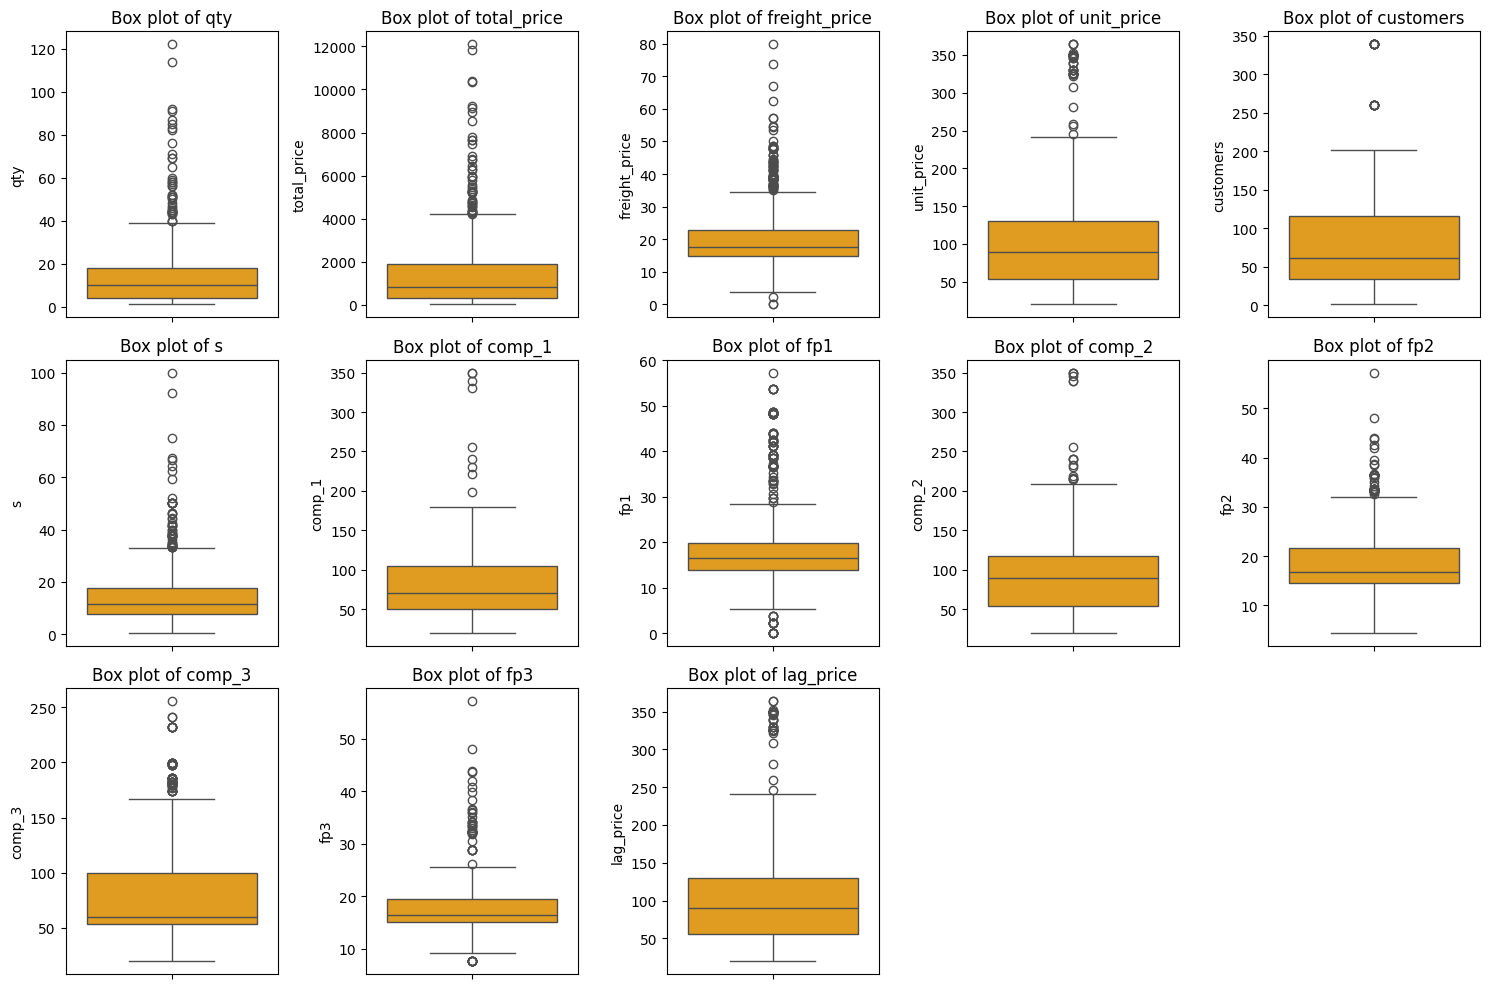

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column],color='orange')
    plt.title(f'Box plot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

Using Capping method for Outliers treatment to retain all the data points but reduce the influence of extreme outliers and not drastically tranforming the entire distribution

In [ ]:
# Capping using the 1th and 99th percentiles
for column in num_cols:
    lower_limit = df[column].quantile(0.01)
    upper_limit = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

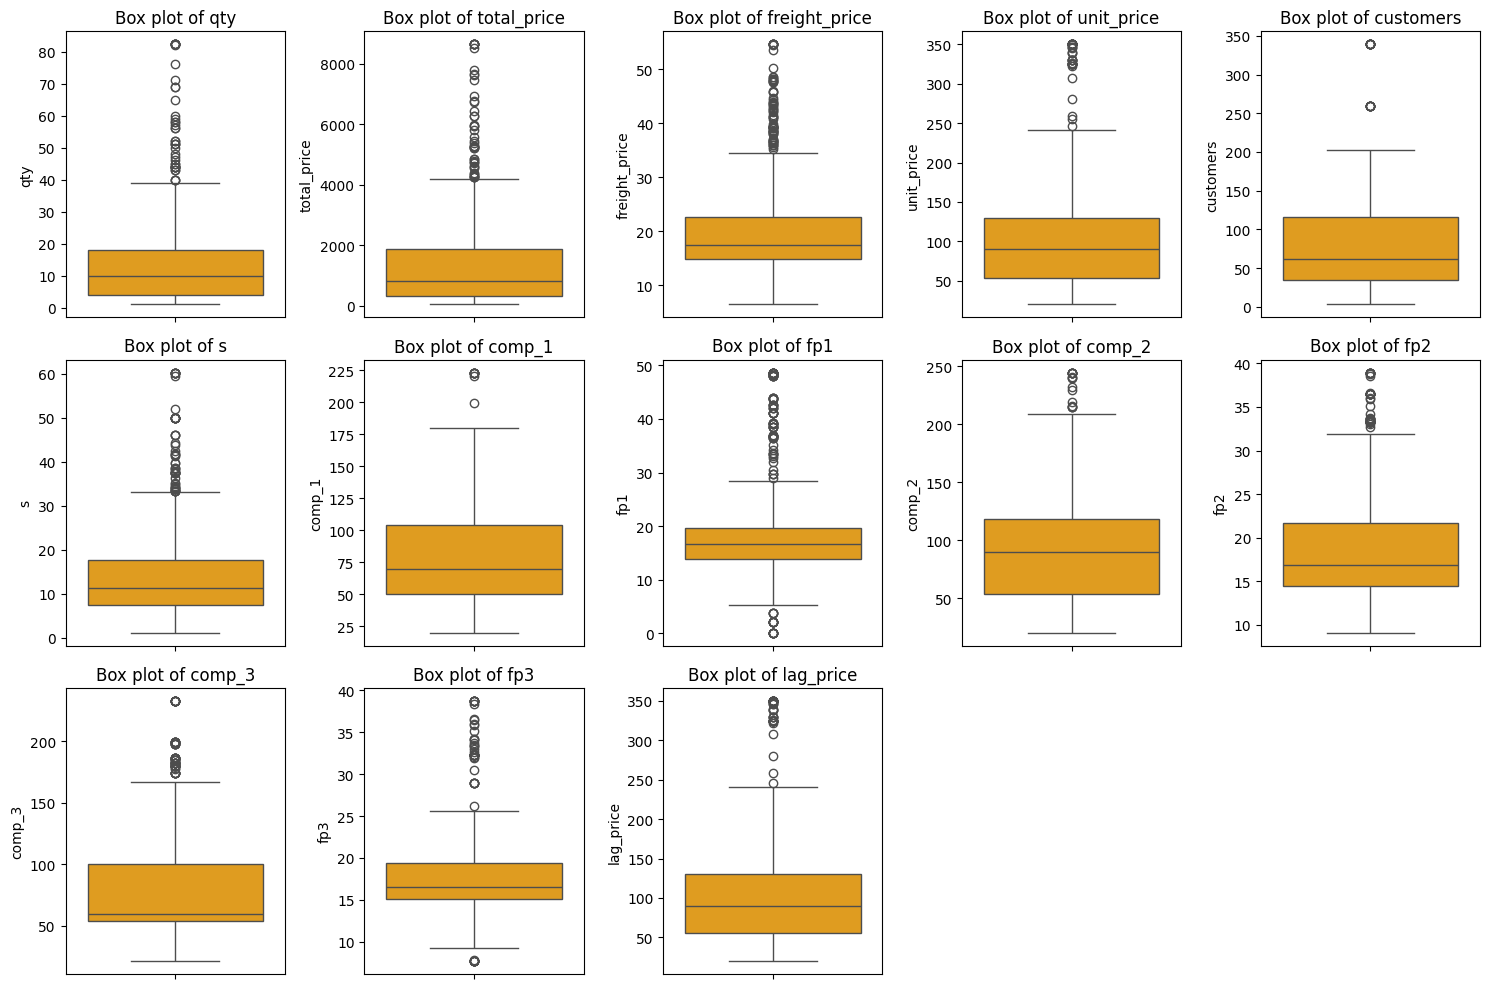

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column],color='orange')
    plt.title(f'Box plot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

Outlier treatment is done

#Analysis and Distribution of Variables

- UniVariate Analysis
- Statistical Summary

**Categorical Features**

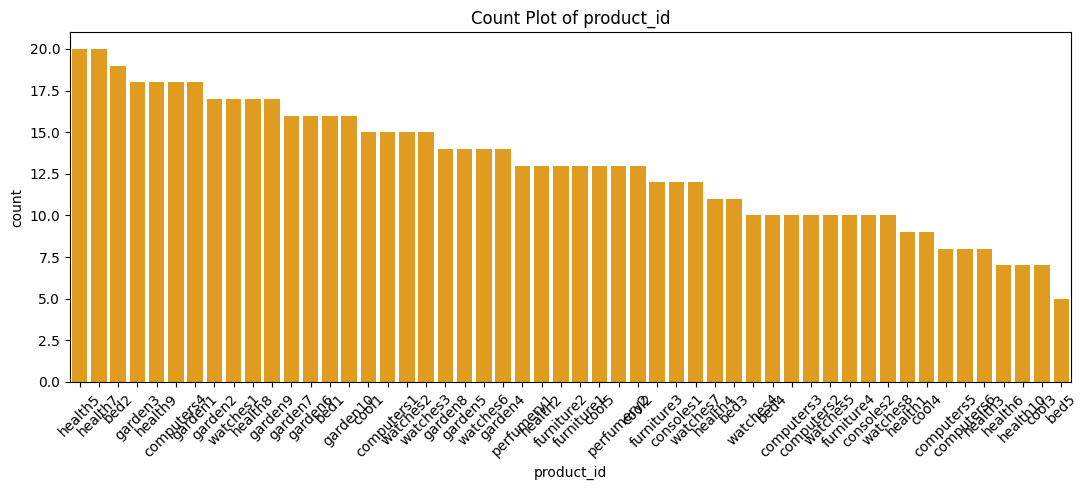

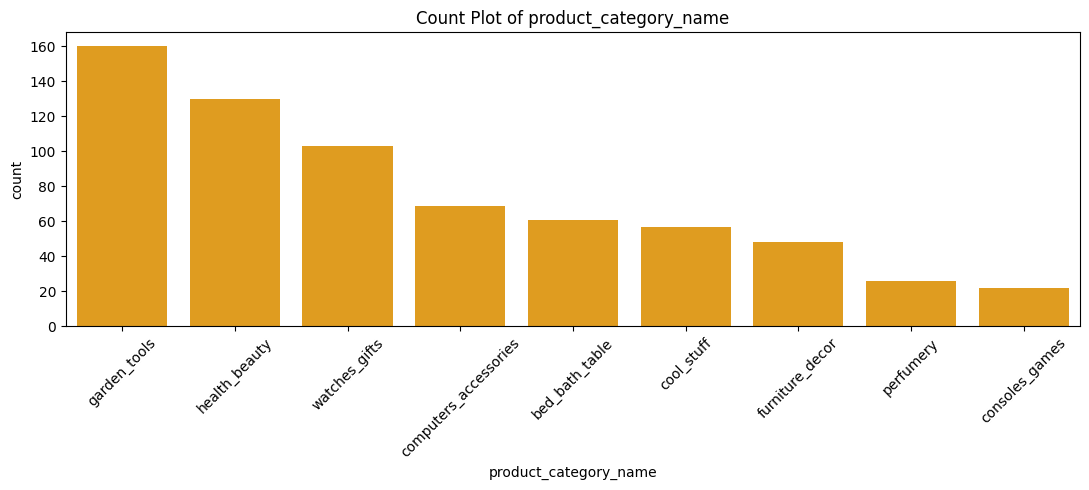

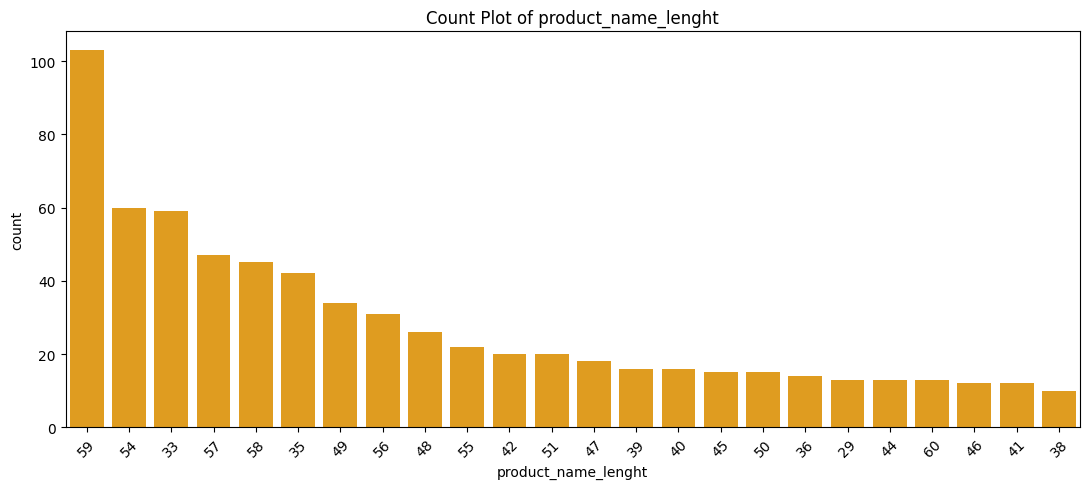

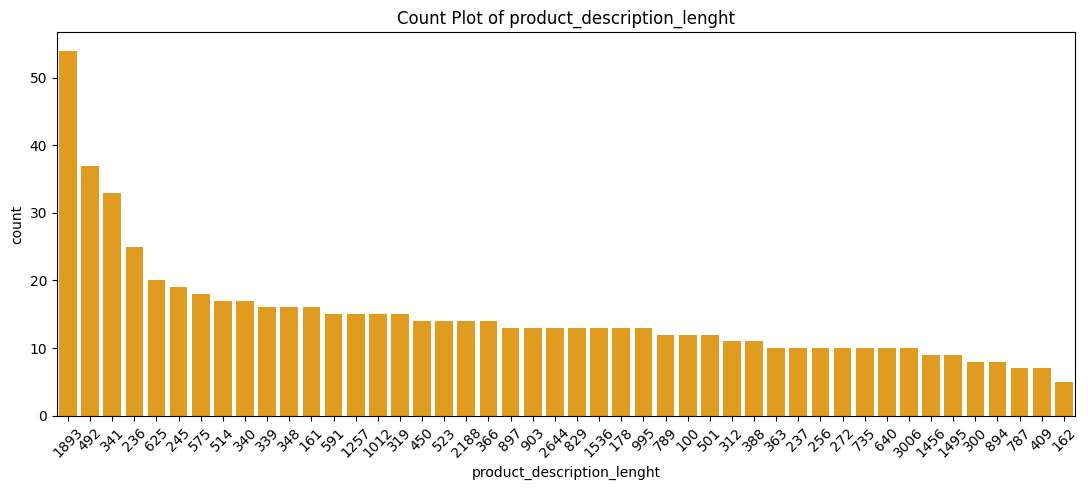

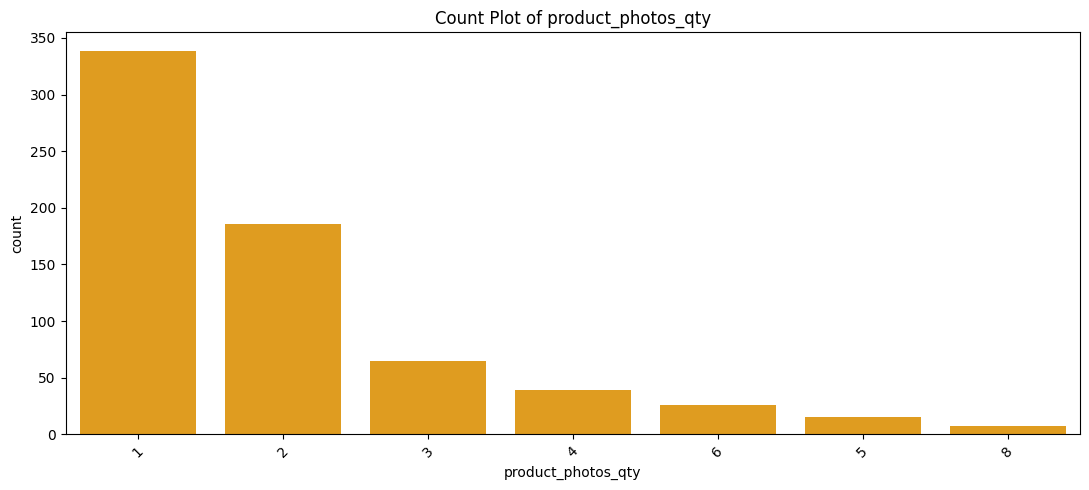

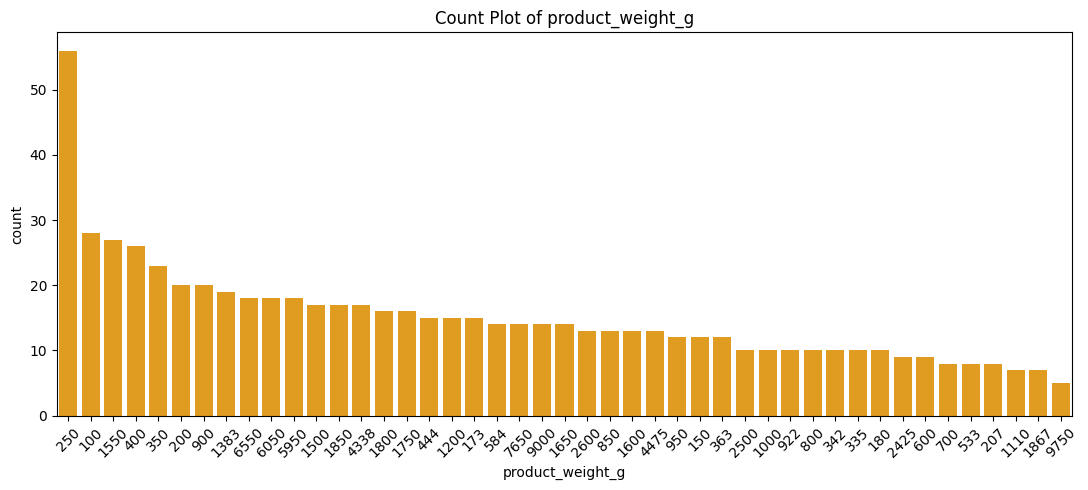

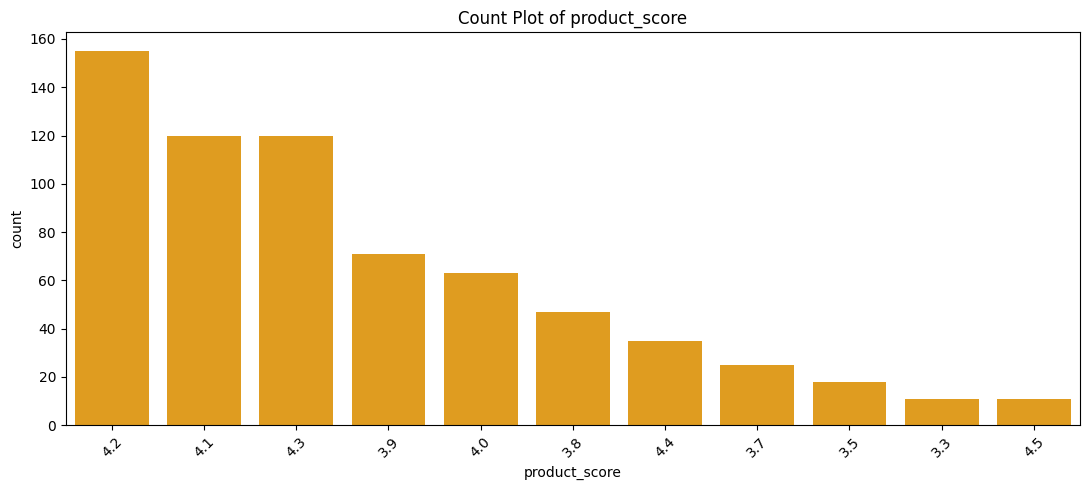

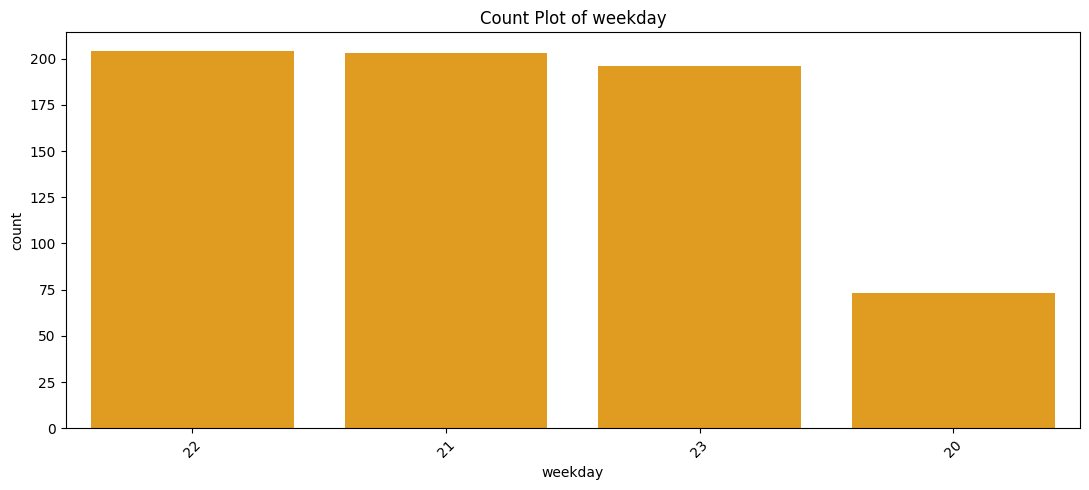

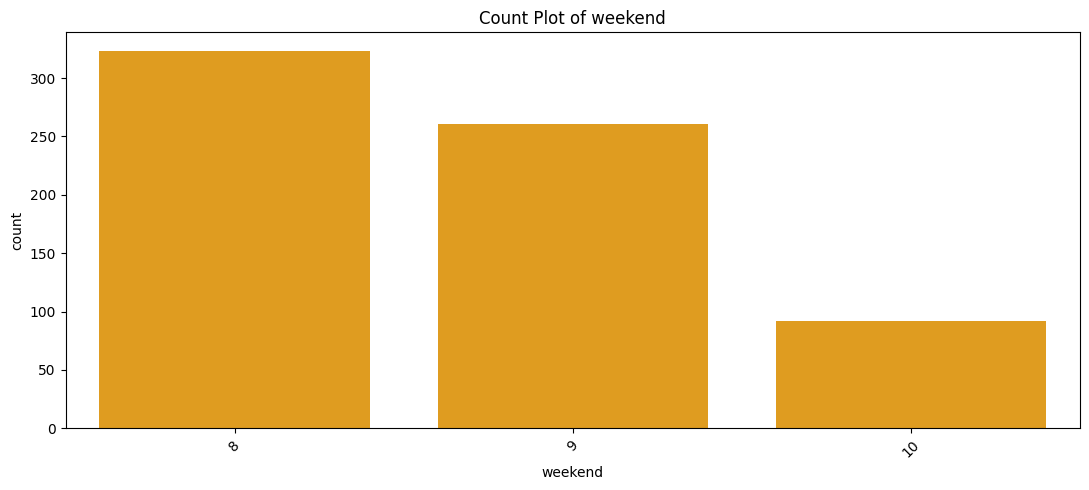

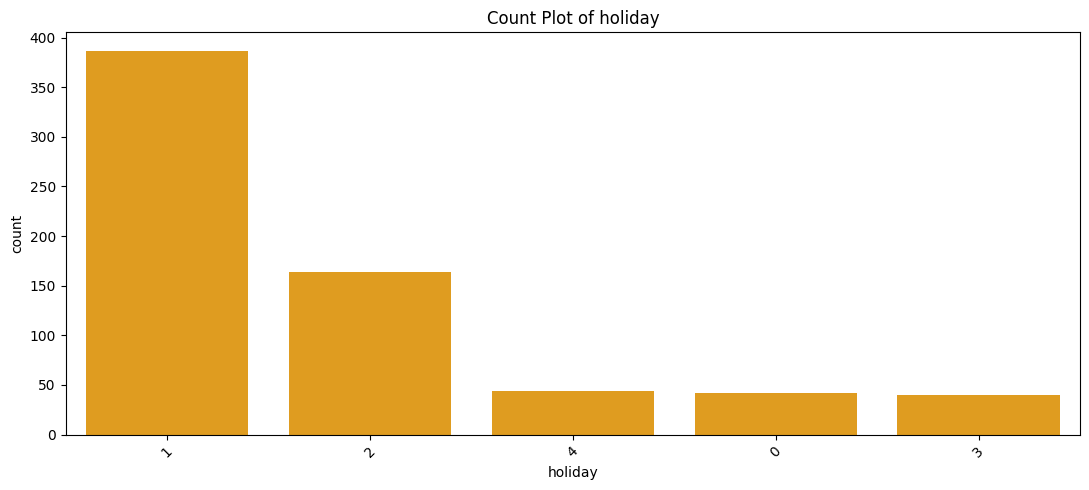

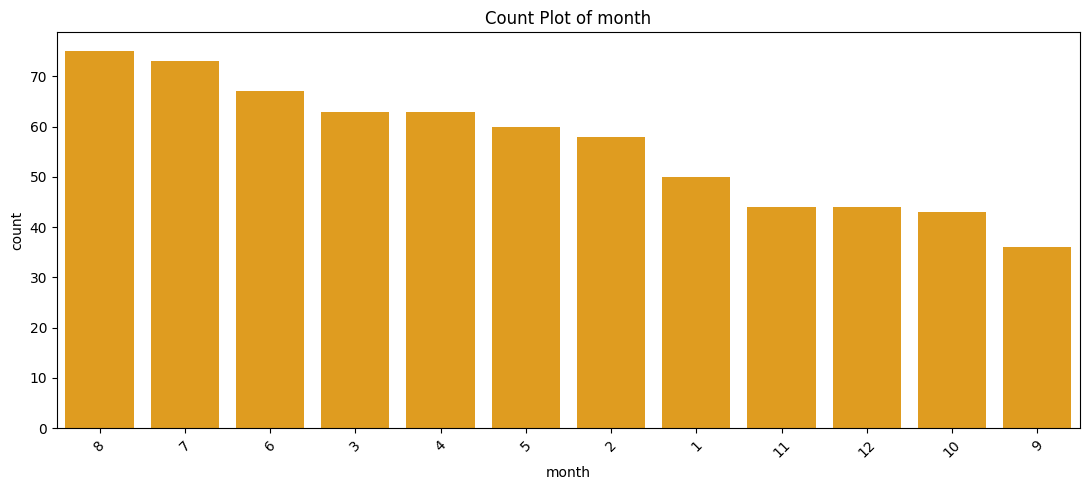

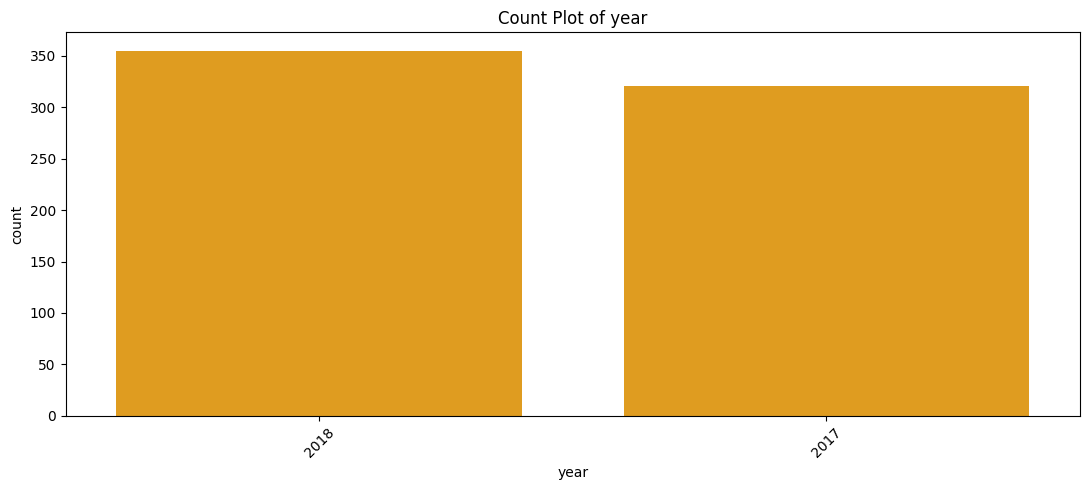

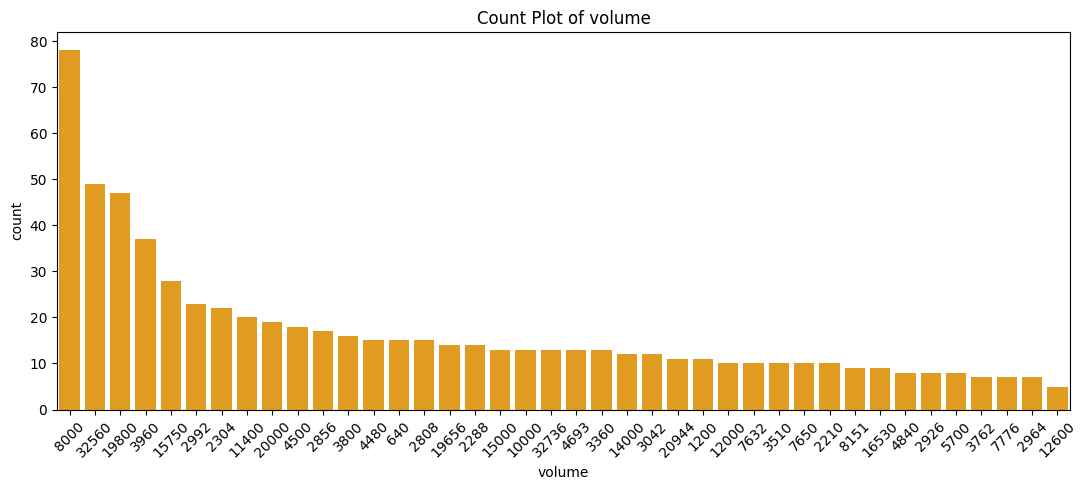

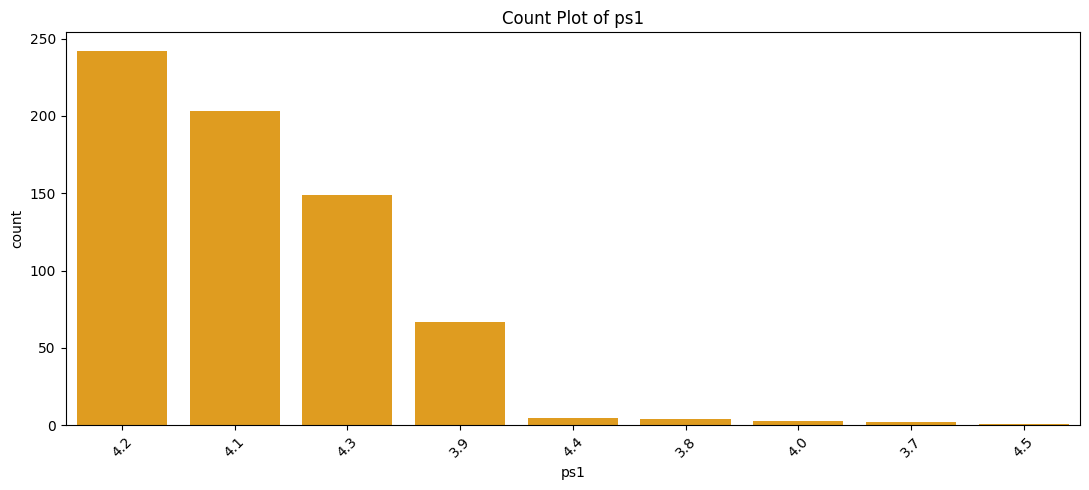

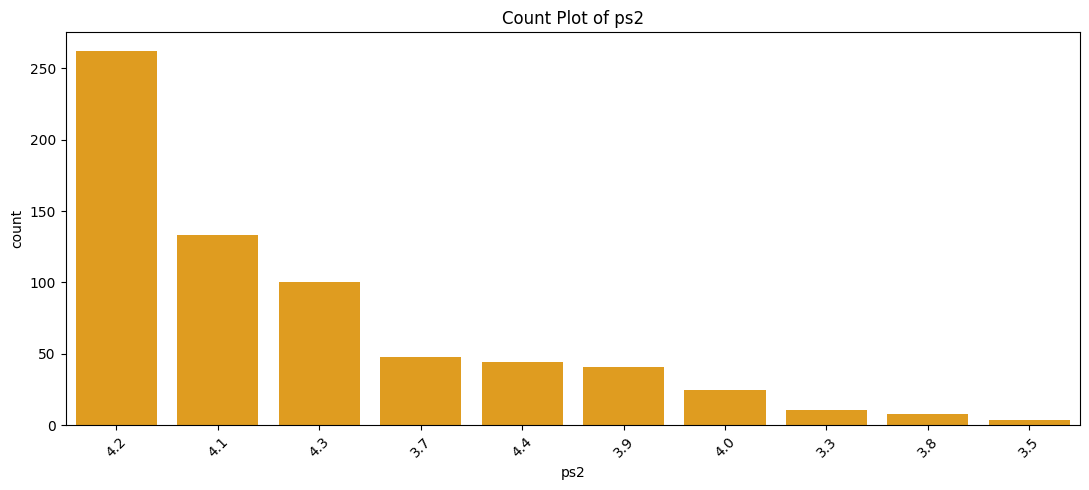

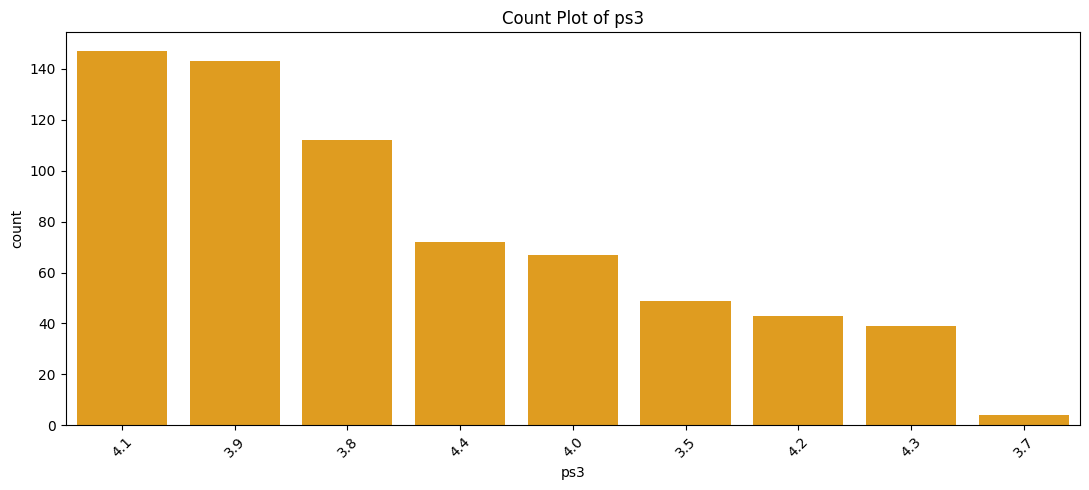

In [ ]:
for column in cat_cols:
    plt.figure(figsize=(11, 5))

    # Sort categories by their count in descending order
    sorted_order = df[column].value_counts().index

    sns.countplot(data=df, x=column, order=sorted_order, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Observations:

* 'health5' and 'health7' are the most ordered product_id followed by 'bed2' and 'garden3' and 'health9'
* Maximum orders are from product category 'garden_tools' followed by 'health_beauty' and 'watches_gifts'
* Most of the products have length of the name as 59 followed by 54 and 33
* Most products sold hve length of description 1893 followed by 492 and 341
* Maximum products sold have 1 photo followed by 2 photos and 3 photos
* Most of the products have weight 250 grams followed by 100 gms and 1550 grams
* Maximum products sold have rating 4.2 followed by 4.1 and 4.3
* Months having 22 weekdays have sold maximum products then 21 days and 23 days
* Months having 8 weekends have got maximum transactions followed by 9 and 10 weekends
* Months having 1 holiday have maximum transactions followed by 2 and 4 holidays
* Products sold in 2018 are higher than in 2017
* Most of the products have volume 8000 followed by 32560 and 19800
* For competitior 1 and competitor 2, most of the products have rating 4.2 then 4.1 and 4.3
* For competitor 3, most of the products have rating 4.1 followed by 3.9 and 3.8


**Numerical Features**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

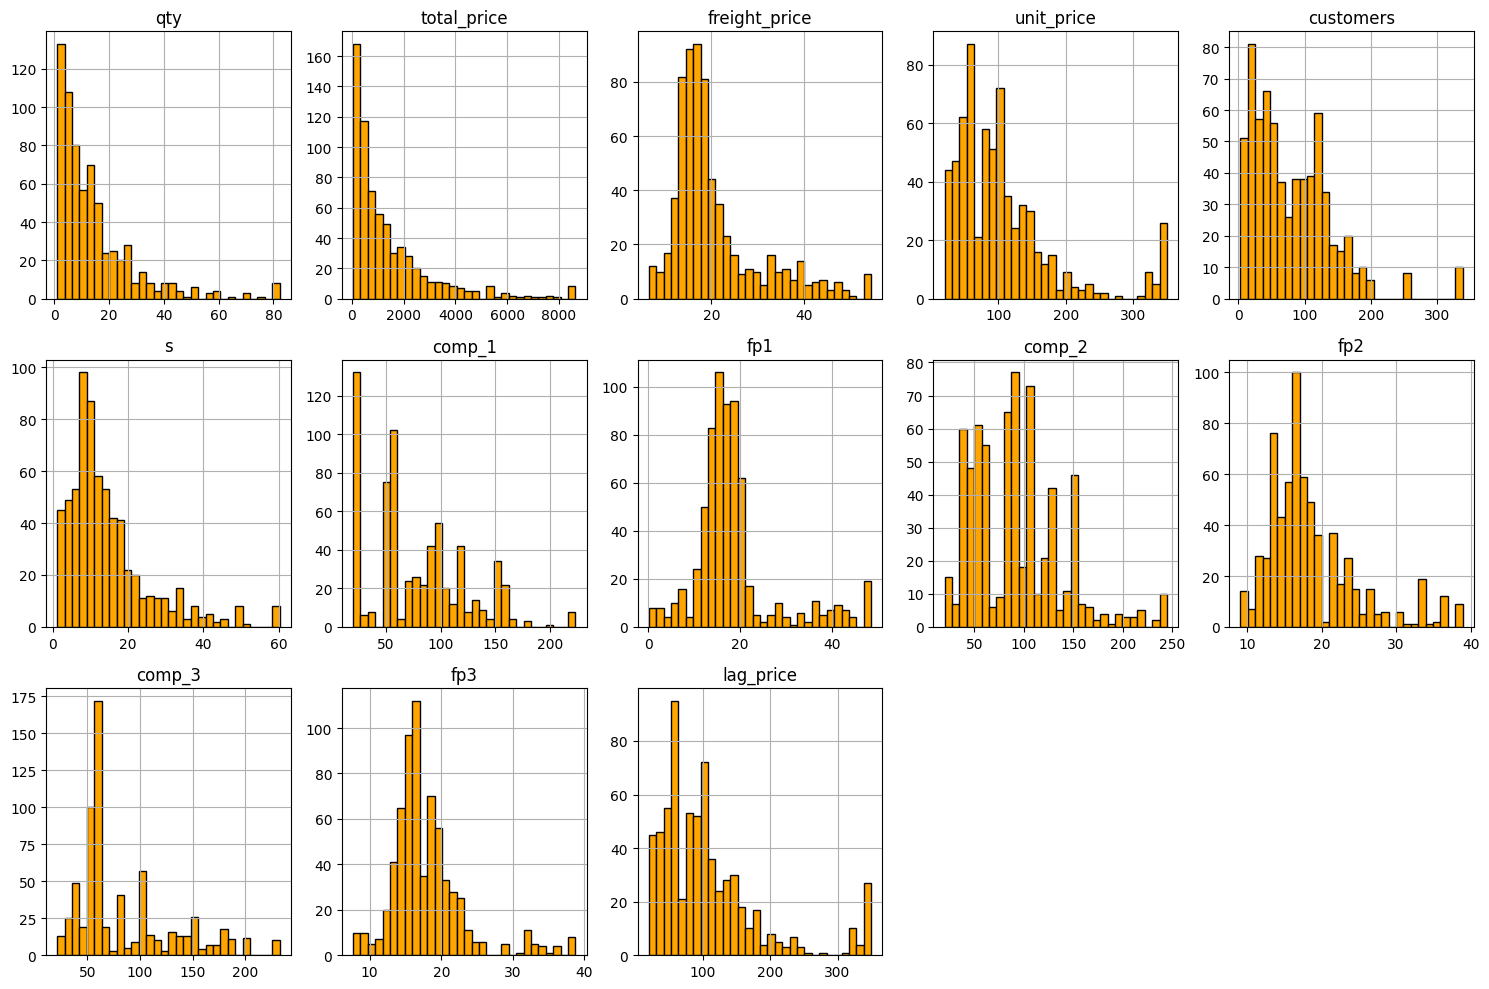

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 3 rows, 5 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Plot histogram for each numerical column
    df[col].hist(ax=axes[i], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observations:

* qty: The distribution is right skewed. In most of the transactions, the quantity of products sold is in the range of 1-5
* total_price: The distribution is right skewed. Most of the transactions have got the total price (qty*price) in the range of 0-1000
* The average freight prices in most of the transactions is in the range of 10-20
* Average unit price of any product lies in the range of 50-100 for most of the transactions
* The number of customers who purchased the product in a given category lie mostly in the range of 0-50
* Effect of seasonality lies mostly in the range of 5-15
* Competitor 1 pricing is mostly around 20-25
* Competitor 1 freight price is mostly in the range of 10-20
* Competitor 2 price is mostly in the range of 50-100
* Competitor 2 freight price is mostly in the range 15-20
* Competitor 3 price is mostly in the range 50-70
* Competitor 3 freight price is mostly in the range 15-20
* Previous month price of the product is mostly in the range 50-150

**Statistical Summary**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
product_id,676,52,health5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,676,9,garden_tools,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_year,676,NaN,NaN,NaN,2017-07-16 20:54:40.473372928,2017-01-01 00:00:00,2017-01-09 00:00:00,2018-01-01 00:00:00,2018-01-04 00:00:00,2018-01-08 00:00:00,NaN
qty,676.0,NaN,NaN,NaN,14.350222,1.0,4.0,10.0,18.0,82.25,14.649916
total_price,676.0,NaN,NaN,NaN,1405.837008,38.4,333.7,807.89,1887.3225,8643.8725,1613.247785
freight_price,676.0,NaN,NaN,NaN,20.616193,6.427935,14.761912,17.518472,22.713558,54.5895,9.569711
unit_price,676.0,NaN,NaN,NaN,106.431548,19.99,53.9,89.9,129.99,349.9,75.964527
product_name_lenght,676.0,24.0,59.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_description_lenght,676.0,46.0,1893.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_photos_qty,676.0,7.0,1.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Observations:

 * Average quantity of product in a given transaction is found to be 14.35 with minimum 1 and maximum 82.25
 * The average total price of the product is 1405 with minimum 38.4 and max 8643
 * Average freight price is 20.6
 * Average unit price is 106
 * The average number of customers who purchased the product in a given category is 81
 * Average effect of seasonality is 14.5
 * Average price of competitor 1 is 78.66
 * Average freight price of competitor 1 is 18.54
 * Average price of competitor 2 is 92
 * Average freight price of competitor 2 is 18.57
 * Average price of competitor 3 is 84.14
 * Average freight price of competitor 3 is 17.9
 * Average previous month price of the product is 107

#Correlation

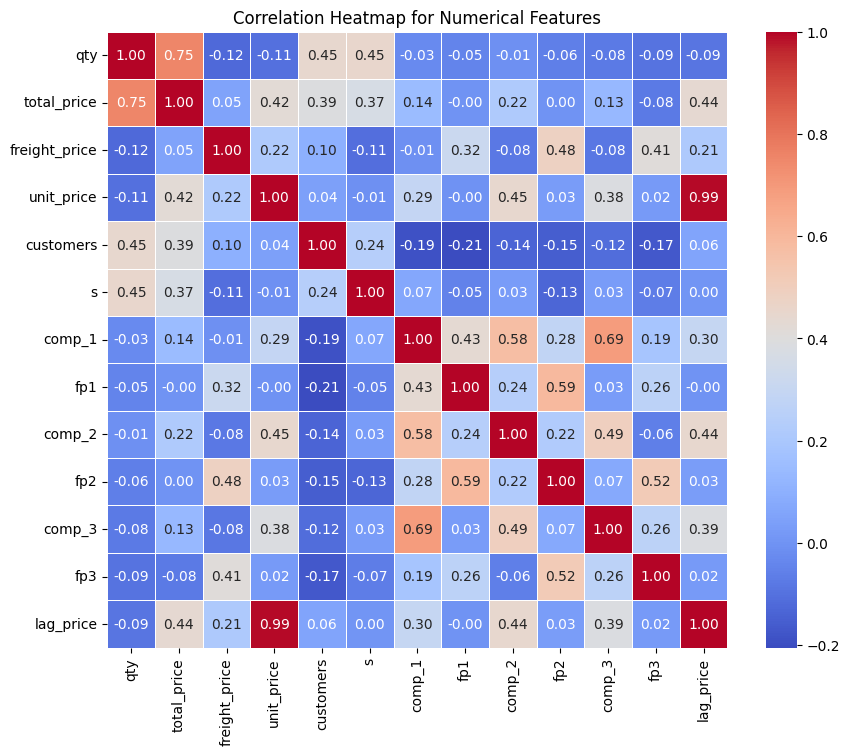

In [ ]:
# Compute the correlation matrix for the numerical columns
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Observations:

* 'qty' shows mild positive correlation with 's' and 'customers' and high positive correlation with 'total_price'
* 'total_price' show mild positive correlation to 'lag_price', 's', 'customers' and 'unit_price'
* freight_price' show positive correlation with freight prices of competitor 1, competitor 2 and competitor 3
* 'unit_price' is highly correlated to 'lag_price'
* 'unit_price' show some positive correlation with 'total_price', 'comp_1', 'comp_2' and 'comp_3'
* 'comp_1' show positive correlation to 'comp_2' and 'comp_3'
* 'lag_price' show positive correlation with 'comp_1', 'comp_2' and 'comp_3'

#Revenue, Profit and Profit Margin for each Product

In [ ]:
df1=df.copy()

In [ ]:
df1['Revenue'] = df1['qty'] * df1['unit_price']

# 2. Calculate Profit for each row: Profit = Revenue - freight_price
df1['Profit'] = df1['Revenue'] - df1['freight_price']

# 3. Adjust profit by considering the average competitor prices (comp_1, comp_2, comp_3)
# If competitors' prices reduce effective profit, subtract them to simulate competitive pressure
df1['Adjusted_Profit'] = df1['Profit'] - (df1['comp_1'] + df1['comp_2'] + df1['comp_3']) / 3

# 4. Group by product_id and aggregate Revenue, Profit, and Adjusted Profit
df_grouped = df1.groupby('product_id').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Total_Adjusted_Profit=('Adjusted_Profit', 'sum')
).reset_index()

# 5. Calculate Profit Margin for each product: Profit_Margin = Total_Profit / Total_Revenue
df_grouped['Profit_Margin'] = df_grouped['Total_Profit'] / df_grouped['Total_Revenue']

# 6. Calculate Adjusted Profit Margin: Adjusted_Profit_Margin = Total_Adjusted_Profit / Total_Revenue
df_grouped['Adjusted_Profit_Margin'] = df_grouped['Total_Adjusted_Profit'] / df_grouped['Total_Revenue']

# View the result
df_grouped.head()


,product_id,Total_Revenue,Total_Profit,Total_Adjusted_Profit,Profit_Margin,Adjusted_Profit_Margin
0,bed1,5831.770000,5591.359238,4427.373127,0.958776,0.759182
1,bed2,42935.281568,42611.077417,41016.099850,0.992449,0.955301
2,bed3,10307.135000,10132.801016,9336.710015,0.983086,0.905849
3,bed4,6003.042222,5851.465917,5275.075102,0.974750,0.878734
4,bed5,30003.268513,29907.253009,29350.200171,0.996800,0.978233


In [ ]:
#Total Revenue
total_revenue_sum = df_grouped['Total_Revenue'].sum()
print(total_revenue_sum)

953150.8554667274


In [ ]:
#Total Quantity Sold
df.qty.sum()

9700.75

* Obtained Total Revenue, Profit, Adjusted Profit and Profit margin for each product
* Adjusted Profit accounts for the average of the competitor prices (comp_1, comp_2, comp_3). It's subtracted from the calculated profit to simulate the pressure of competition on prices.

**Average Order Value**

In [ ]:
# Calculate AOV (Average Order Value)
AOV = df1['total_price'].sum() / len(df1)

# Display the result
print(f"Average Order Value (AOV): {AOV}")

Average Order Value (AOV): 1405.8370081360945


#Number of Transactions on weekends and holidays

In [ ]:
# Step 1: Extract day and weekday from 'month_year'
df1['day'] = df1['month_year'].dt.day
df1['day_of_week'] = df1['month_year'].dt.dayofweek  # Monday=0, Sunday=6

# Step 2: Create 'is_weekend' feature based on day_of_week (Saturday=5, Sunday=6)
df1['is_weekend'] = df1['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 3: Create 'is_holiday' feature based on the number of holidays in that month
df1['is_holiday'] = df1['holiday'].apply(lambda x: 1 if x > 0 else 0)

# Step 4: Drop temporary columns if necessary
df1.drop(columns=['day_of_week', 'day'], inplace=True)

In [ ]:
df1.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,Revenue,Profit,Adjusted_Profit,is_weekend,is_holiday
0,bed1,bed_bath_table,2017-01-05,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,9.082500,45.95,4.0,15.100000,45.90,45.95,30.850000,-86.100000,0,1
1,bed1,bed_bath_table,2017-01-06,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85,124.916667,9.966667,0,1
2,bed1,bed_bath_table,2017-01-07,6.0,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70,260.860000,147.243333,1,1
3,bed1,bed_bath_table,2017-01-08,4.0,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80,169.512500,57.725899,1,1
4,bed1,bed_bath_table,2017-01-09,2.0,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90,76.800000,-22.949570,0,1


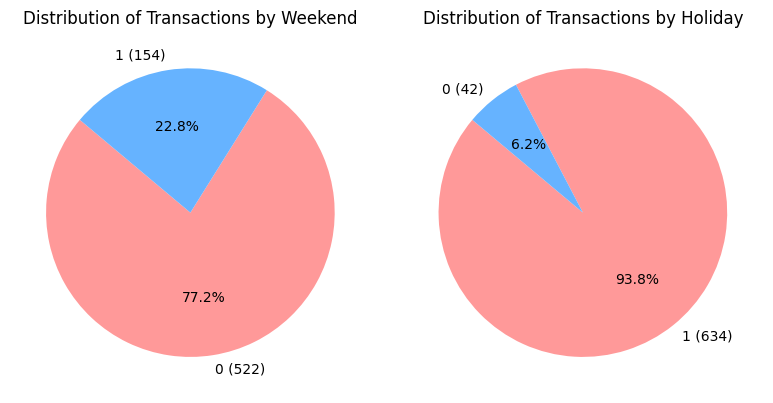

In [ ]:
# Function to plot a pie chart with counts outside and percentages inside
def plot_pie_chart(ax, data, column_name, title):
    # Calculate value counts and percentages
    counts = data[column_name].value_counts()
    percentages = data[column_name].value_counts(normalize=True) * 100

    # Custom function to format percentages inside the pie chart
    def func(pct, allvals):
        return f'{pct:.1f}%'

    # Custom labels for the counts outside
    labels = [f'{key} ({value})' for key, value in zip(counts.index, counts)]

    # Plot pie chart on the specified axes
    ax.pie(counts, labels=labels,
           autopct=lambda pct: func(pct, counts),
           startangle=140, colors=['#ff9999', '#66b3ff'])
    ax.set_title(title)

# Create a 1x2 grid for side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot pie charts for 'is_weekend' and 'is_holiday' side by side
plot_pie_chart(ax[0], df1, 'is_weekend', 'Distribution of Transactions by Weekend')
plot_pie_chart(ax[1], df1, 'is_holiday', 'Distribution of Transactions by Holiday')

plt.tight_layout()
plt.show()


Observations:

* 22.8% of the transactions occured on a weekend
* 93.8% of the transactions occured on a holiday

#Monthly Revenue Trend

In [ ]:
# Step 1: Group by 'month_year' and aggregate the total revenue
monthly_revenue = df1.groupby('month_year')['total_price'].sum().reset_index()

# Step 2: Sort by 'month_year' to ensure the data is in chronological order
monthly_revenue = monthly_revenue.sort_values(by='month_year')

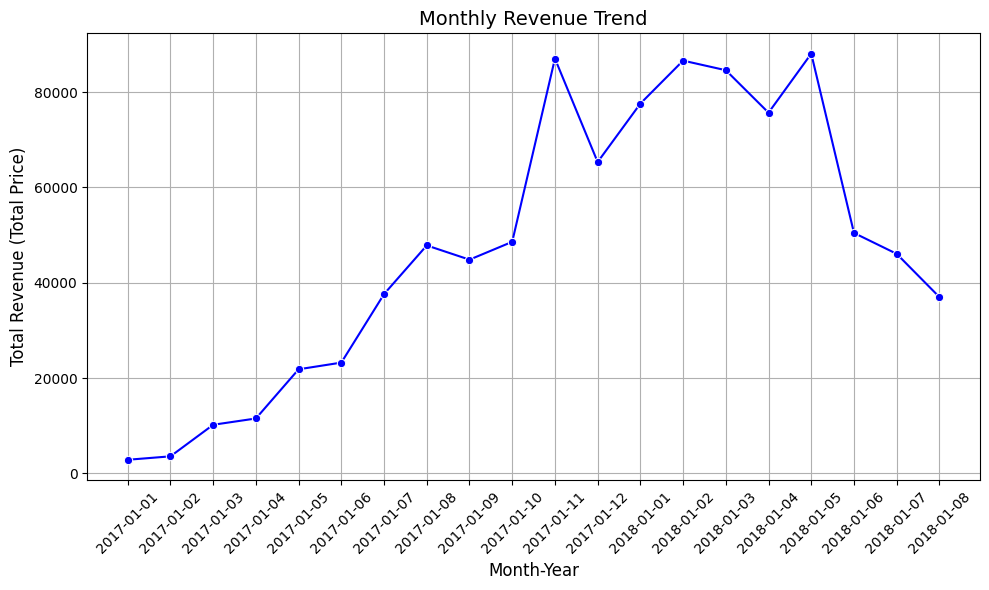

In [ ]:
# Step 4: Create the plot using Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_revenue['month_year'].astype(str),
             y=monthly_revenue['total_price'],
             marker='o', color='b')

# Step 5: Set plot labels and title
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue (Total Price)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Step 6: Display the plot
plt.tight_layout()
plt.show()

In [ ]:
monthly_revenue

,month_year,total_price
0,2017-01-01,2864.1900
1,2017-01-02,3584.1100
2,2017-01-03,10204.3800
3,2017-01-04,11524.6200
4,2017-01-05,21843.3300
5,2017-01-06,23245.2400
6,2017-01-07,37617.2625
7,2017-01-08,47819.2825
8,2017-01-09,44835.5000
9,2017-01-10,48577.8800


Observations:

* Highest Revenue is observed in May,2018 closely followed by Novemeber,2017 and February,2018
* Overall Revenue is found to be higher in 2018 than 2017
* Overall Revenue trend is found to be increasing since Jan,2017 with highest revenue in May, post which it started decreasing
  

#Relationship between Volume and Total Quantity Sold

To understand if larger or smaller products tend to sell in greater or fewer quantities.

In [ ]:
# Convert 'volume' to numeric
df1['volume'] = pd.to_numeric(df1['volume'], errors='coerce')

# Grouping by product_id to find total quantity sold and average volume for each product
product_summary = df1.groupby('product_id').agg(
    total_qty_sold=('qty', 'sum'),
    avg_volume=('volume', 'mean')
).reset_index()

# Display the summary
print(product_summary)

    product_id  total_qty_sold  avg_volume
0         bed1          143.00      3800.0
1         bed2          487.00     20000.0
2         bed3          111.00     20944.0
3         bed4          131.00      8000.0
4         bed5          154.00     12600.0
5   computers1          139.00      2808.0
6   computers2          183.00      2210.0
7   computers3          103.00      7650.0
8   computers4          341.00      8000.0
9   computers5          127.00      2926.0
10  computers6          274.00      4840.0
11   consoles1          142.00      2304.0
12   consoles2           97.00      2304.0
13       cool1          120.00     15750.0
14       cool2          119.00     15750.0
15       cool3          114.00      7776.0
16       cool4          108.00     16530.0
17       cool5           97.00     32736.0
18  furniture1          169.00     10000.0
19  furniture2          476.75     15000.0
20  furniture3           97.00     14000.0
21  furniture4          101.00     12000.0
22     gard

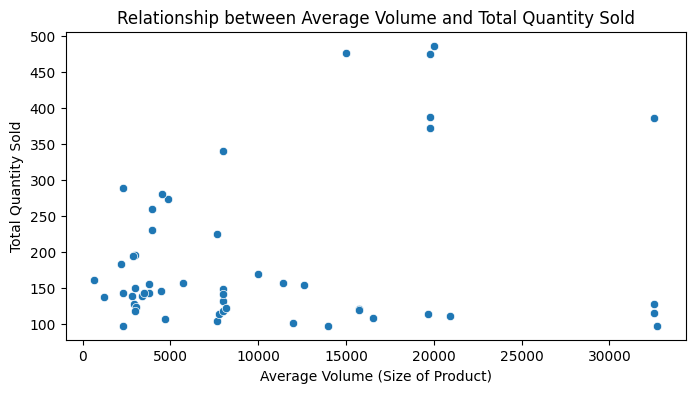

In [ ]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 4))
sns.scatterplot(x='avg_volume', y='total_qty_sold', data=product_summary)
plt.title('Relationship between Average Volume and Total Quantity Sold')
plt.xlabel('Average Volume (Size of Product)')
plt.ylabel('Total Quantity Sold')
plt.show()

Observations:

* Most of the products have average volume less than  10000 and total quantity sold upto 300 units
* The products having total quantity sold to the highest level i.e around 400 and plus have average volume around 20000
* Products having average volume greater than 30000 sell mostly lesser quantity below 150

#Effect of price on the quantity sold for different products.

In [ ]:
df1['product_score'] = pd.to_numeric(df1['product_score'], errors='coerce')

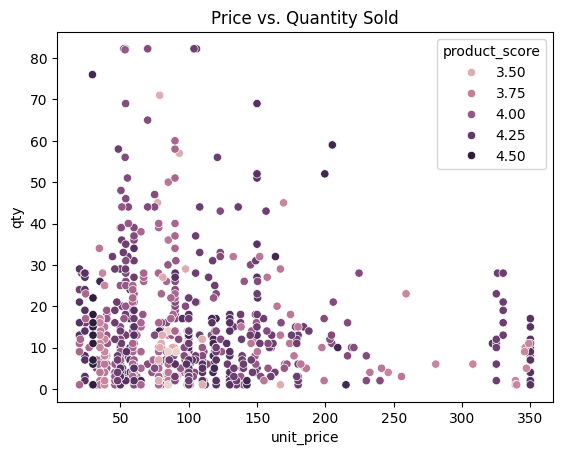

In [ ]:
# Scatter plot to visualize price vs. quantity sold
sns.scatterplot(x='unit_price', y='qty', hue='product_score', data=df1)
plt.title("Price vs. Quantity Sold")
plt.show()

Observations:

* Most of the products are below unit price of 200
* Very less amount of products are sold priced around 300-350
* Least product score is mostly observed for products priced below 100

#Product Score vs Quantity Sold

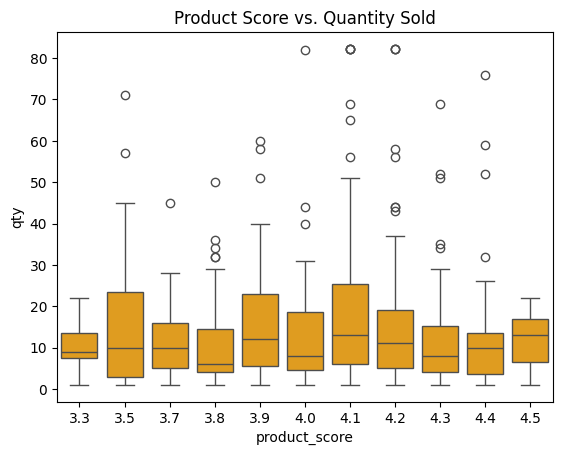

In [ ]:
# Box plot to compare quantity sold based on product score
sns.boxplot(x='product_score', y='qty', data=df1,color='orange')
plt.title("Product Score vs. Quantity Sold")
plt.show()

Observations:

* Products with score 4.1 and 4.5 are sold most closely followed by 3.9
* Products with score 3.3 which is the least score are sold more consistently in quantity
* Products with score 4.1, 4.2, 4.3 and 4.4 show some right skewedness with some high selling products

####**Hypothesis Testing to check quantity sold between two groups. One with product scores higher than 4.2 and one with lower than that**

In [ ]:
from scipy.stats import ttest_ind
high_score_products = df1[df1['product_score'] >= 4.2]['qty']
low_score_products = df1[df1['product_score'] < 4.2]['qty']
t_stat, p_value = ttest_ind(high_score_products, low_score_products)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -1.762244604631733, P-value: 0.07848121570181789


**T-statistic (-1.76):**

* The t-statistic measures how much the means of the two groups (high-scoring and low-scoring products) differ relative to the variation in the data.
* A negative t-statistic suggests that the mean quantity sold for low-scoring products might be slightly higher than for high-scoring products, but the difference is not large.

**P-value (0.0785):**

* The p-value tells the probability that the observed difference between the two groups happened by chance, assuming that there is no real difference between them.
* A p-value of 0.078 means that there’s roughly a 7.8% chance that the difference between the means is due to random variation rather than a real effect.
* The typical threshold for significance is 0.05 (5%). Since p-value is higher than 0.05, we cannot reject the null hypothesis, meaning that there is no statistically significant difference between the quantity sold of high-scoring and low-scoring products at the 5% level.

**Interpretation:**

While there seems to be some difference in the quantity sold between high-scoring and low-scoring products, the evidence is not strong enough (with a p-value > 0.05) to conclude that the difference is statistically significant.

#Monthly Demand Analysis

In [ ]:
# Step 1: Group by 'month_year' and aggregate the total quantity
monthly_qty = df1.groupby('month_year')['qty'].sum().reset_index()

# Step 2: Sort by 'month_year' to ensure the data is in chronological order
monthly_qty = monthly_qty.sort_values(by='month_year')

In [ ]:
# Calculate average quantity sold across the entire dataset
average_qty = df1['qty'].mean()
# Define demand categories based on the quantity sold compared to the average
df1['demand'] = np.where(df1['qty'] > average_qty, 'High Demand', 'Low Demand')

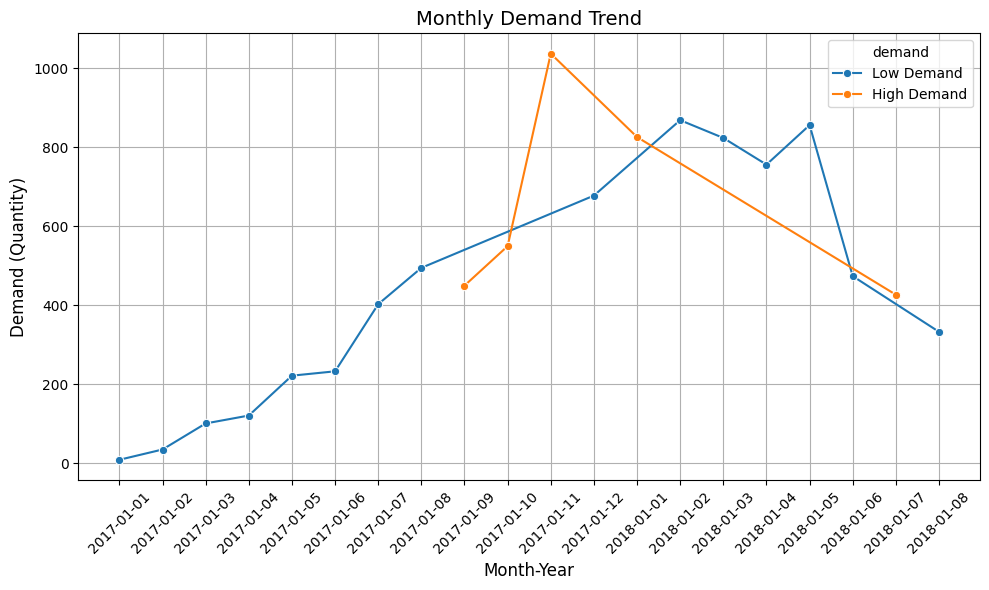

In [ ]:
# Step 4: Create the plot using Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_qty['month_year'].astype(str),
             y=monthly_qty['qty'],hue= df1['demand'],
             marker='o')

# Step 5: Set plot labels and title
plt.title('Monthly Demand Trend', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Demand (Quantity)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Step 6: Display the plot
plt.tight_layout()
plt.show()

Observations:

* Demand is observed to be highest in October followed by Jan 2018, August 2017, Sept 2017 and July 2018

#Number of Customers by Product Category

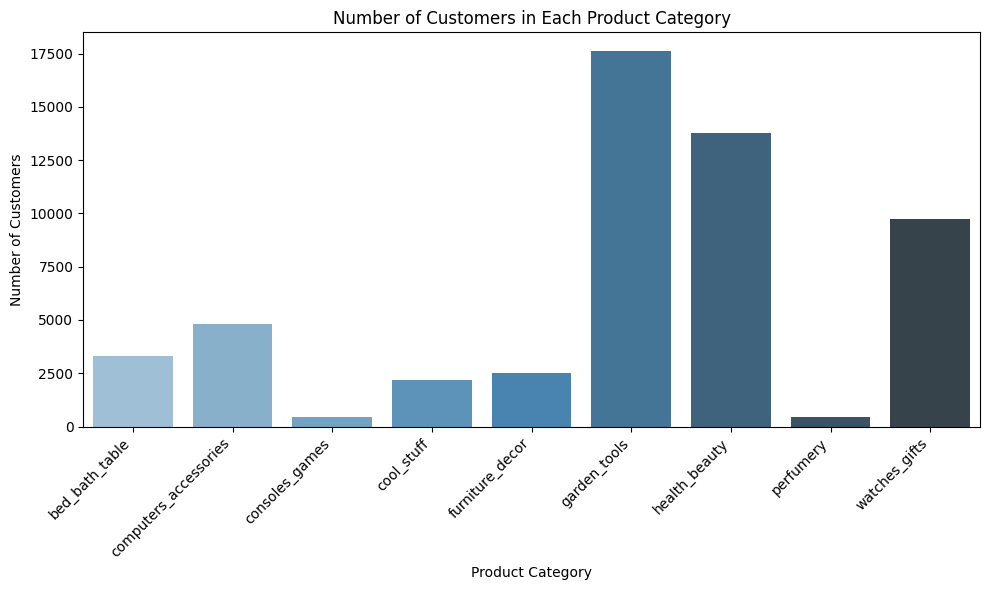

In [ ]:
# Group by product category and sum the number of customers
category_customer_data = df1.groupby('product_category_name')['customers'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name', y='customers', data=category_customer_data, palette='Blues_d')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Product Category')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
category_customer_data.customers.sum()

54782

Observations:

* Highest number of customers bought garden_tools followed by health_beauty and watches_gifts

#Total Revenue by Product Category and Year

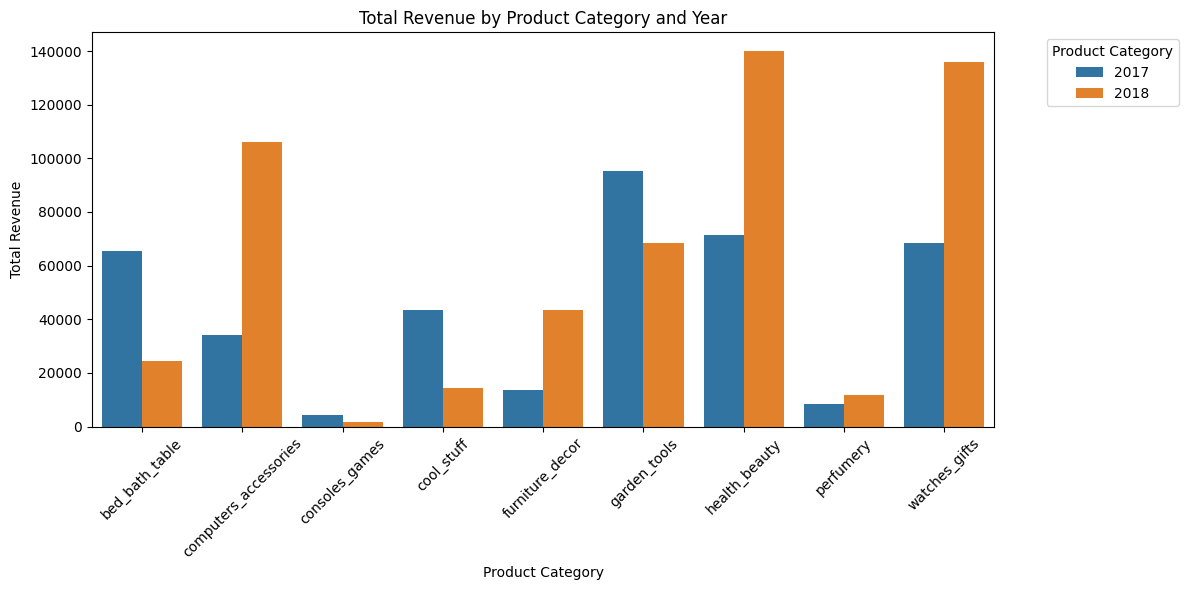

In [ ]:
#df1['year'] = df1['year'].astype(int)

# Group by product_category_name and year, and calculate the total revenue
revenue_by_category_year = df1.groupby(['product_category_name', 'year']).agg(
    total_revenue=('total_price', 'sum')
).reset_index()

# Set plot size
plt.figure(figsize=(12, 6))

# Create the barplot for each product category by year
sns.barplot(x='product_category_name', y='total_revenue', hue='year', data=revenue_by_category_year)

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category and Year')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
revenue_by_category_year

,product_category_name,year,total_revenue
0,bed_bath_table,2017,65590.6150
1,bed_bath_table,2018,24311.6500
2,computers_accessories,2017,34135.7500
3,computers_accessories,2018,106262.9725
4,consoles_games,2017,4261.0000
5,consoles_games,2018,1566.3000
6,cool_stuff,2017,43581.7500
7,cool_stuff,2018,14383.4500
8,furniture_decor,2017,13642.4600
9,furniture_decor,2018,43286.1000


Observations:

* Categories such as bed_bath_table, cool_stuff, garden_tools and consoles_games have driven more revenue in 2017 than in 2018
* Categories such as computer_accessories, furniture_decor, health_beauty, perfumery and watches_gifts have driven more revenue in 2018 than in 2017
* garden_tools have driven maximum revenue in 2017 followed by health_beauty and watches_gifts
* heatlh_beauty have got maximum revenue in 2018 closely followed by watches_gifts and computer_accessories

#Different Pricing Models and their Impact on Revenue

There are various Pricing Models as shared below:

1. Cost Plus Pricing: Add a fixed markup to the cost of goods to determine the price.
2. Competitor-Based Pricing: Set prices based on competitors' prices for similar products.
3. Dynamic Pricing: Adjust prices in real-time based on factors like demand, inventory, and competitor prices
4. Value Based Pricing: Set prices based on the perceived value to the customer rather than the actual cost.


**Will evaluate each of these Pricing Strategies and come up with a final recommendation**

In [ ]:
# Cost-Plus Pricing (assuming 20% markup on cost)
df1['cost_price'] = df1['unit_price'] * 0.80  # Assume cost is 80% of unit price
df1['cost_plus_price'] = df1['cost_price'] * 1.20  # 20% markup

# Competitor-Based Pricing (average of competitor prices)
df1['competitor_based_price'] = df1[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)

# Dynamic Pricing (adjusted based on demand; higher demand, higher price)
df1['dynamic_price'] = np.where(
    df1['qty'] > df1['qty'].mean(),
    df1['cost_price'] * 1.40,  # Increase price if demand is higher
    df1['cost_price'] * 1.10   # Decrease price if demand is lower
)

In Value based Pricing, we are taking into account Product score and unit_price.

There are various ways to define high and low thresholds for Value Based pricing. Here we are going ahead with below defined values considering distribution of scores.

In [ ]:
# Enhanced Value-Based Pricing Strategy
high_score_threshold = 4.2
low_score_threshold = 3.8

# Adjust pricing based on product score and unit price
df1['value_based_price'] = np.where(
    (df1['product_score'] >= high_score_threshold) & (df1['unit_price'] > df1['unit_price'].mean()),
    df1['cost_price'] * 1.40,  # Premium pricing for high-value products
    np.where(
        df1['product_score'] < low_score_threshold,
        df1['cost_price'] * 1.10,  # Discount pricing for lower-value products
        df1['cost_price'] * 1.20  # Standard pricing for mid-range products
    )
)


In [ ]:
df1.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,Revenue,Profit,Adjusted_Profit,is_weekend,is_holiday,demand,cost_price,cost_plus_price,competitor_based_price,dynamic_price,value_based_price
0,bed1,bed_bath_table,2017-01-05,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,9.082500,45.95,4.0,15.100000,45.90,45.95,30.850000,-86.100000,0,1,Low Demand,36.76,44.112,116.950000,40.436,44.112
1,bed1,bed_bath_table,2017-01-06,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85,124.916667,9.966667,0,1,Low Demand,36.76,44.112,114.950000,40.436,44.112
2,bed1,bed_bath_table,2017-01-07,6.0,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70,260.860000,147.243333,1,1,Low Demand,36.76,44.112,113.616667,40.436,44.112
3,bed1,bed_bath_table,2017-01-08,4.0,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80,169.512500,57.725899,1,1,Low Demand,36.76,44.112,111.786601,40.436,44.112
4,bed1,bed_bath_table,2017-01-09,2.0,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90,76.800000,-22.949570,0,1,Low Demand,36.76,44.112,99.749570,40.436,44.112


**Segment the dataset into Test Groups**

Perform A/B testing of different pricing strategies on the dataset

In [ ]:
# Split dataset into two or more groups for testing
np.random.seed(42)
df1['test_group'] = np.random.choice(['A', 'B', 'C', 'D'], size=len(df1), p=[0.25, 0.25, 0.25, 0.25])

Group A will use Cost-Plus Pricing.

Group B will use Competitor-Based Pricing.

Group C will use Dynamic Pricing.

Group D will use Value-Based Pricing

In [ ]:
# Apply different pricing strategies to each test group
# Create pricing strategies
df1['test_price'] = np.where(df1['test_group'] == 'A', df1['cost_plus_price'],  # Group A: Cost-Plus Pricing
                     np.where(df1['test_group'] == 'B', df1['competitor_based_price'],  # Group B: Competitor-Based Pricing
                     np.where(df1['test_group'] == 'C', df1['dynamic_price'],  # Group C: Dynamic Pricing
                     df1['value_based_price'])))  # Group D: Value-Based Pricing


In [ ]:
df1.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,Revenue,Profit,Adjusted_Profit,is_weekend,is_holiday,demand,cost_price,cost_plus_price,competitor_based_price,dynamic_price,value_based_price,test_group,test_price
0,bed1,bed_bath_table,2017-01-05,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,9.082500,45.95,4.0,15.100000,45.90,45.95,30.850000,-86.100000,0,1,Low Demand,36.76,44.112,116.950000,40.436,44.112,B,116.950
1,bed1,bed_bath_table,2017-01-06,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85,124.916667,9.966667,0,1,Low Demand,36.76,44.112,114.950000,40.436,44.112,D,44.112
2,bed1,bed_bath_table,2017-01-07,6.0,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70,260.860000,147.243333,1,1,Low Demand,36.76,44.112,113.616667,40.436,44.112,C,40.436
3,bed1,bed_bath_table,2017-01-08,4.0,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80,169.512500,57.725899,1,1,Low Demand,36.76,44.112,111.786601,40.436,44.112,C,40.436
4,bed1,bed_bath_table,2017-01-09,2.0,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90,76.800000,-22.949570,0,1,Low Demand,36.76,44.112,99.749570,40.436,44.112,A,44.112


In [ ]:
# Calculate revenue and profit for each product
df1['revenue'] = df1['test_price'] * df1['qty']
df1['profit'] = (df1['test_price'] - df1['cost_price']) * df1['qty']

In [ ]:
df1.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,Revenue,Profit,Adjusted_Profit,is_weekend,is_holiday,demand,cost_price,cost_plus_price,competitor_based_price,dynamic_price,value_based_price,test_group,test_price,revenue,profit
0,bed1,bed_bath_table,2017-01-05,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,9.082500,45.95,4.0,15.100000,45.90,45.95,30.850000,-86.100000,0,1,Low Demand,36.76,44.112,116.950000,40.436,44.112,B,116.950,116.950,80.190
1,bed1,bed_bath_table,2017-01-06,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85,124.916667,9.966667,0,1,Low Demand,36.76,44.112,114.950000,40.436,44.112,D,44.112,132.336,22.056
2,bed1,bed_bath_table,2017-01-07,6.0,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70,260.860000,147.243333,1,1,Low Demand,36.76,44.112,113.616667,40.436,44.112,C,40.436,242.616,22.056
3,bed1,bed_bath_table,2017-01-08,4.0,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80,169.512500,57.725899,1,1,Low Demand,36.76,44.112,111.786601,40.436,44.112,C,40.436,161.744,14.704
4,bed1,bed_bath_table,2017-01-09,2.0,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90,76.800000,-22.949570,0,1,Low Demand,36.76,44.112,99.749570,40.436,44.112,A,44.112,88.224,14.704


#### Analyse the results of A/B Testing

In [ ]:
# Group by test group and analyze performance
results = df1.groupby('test_group').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_qty_sold=('qty', 'mean')
)

print(results)


            total_revenue  total_profit  avg_qty_sold
test_group                                           
A           223064.307254  37177.384542     12.951657
B           191280.492785  22824.126744     14.353896
C           273479.527693  63683.671757     14.877941
D           249608.871929  51227.332245     15.302632


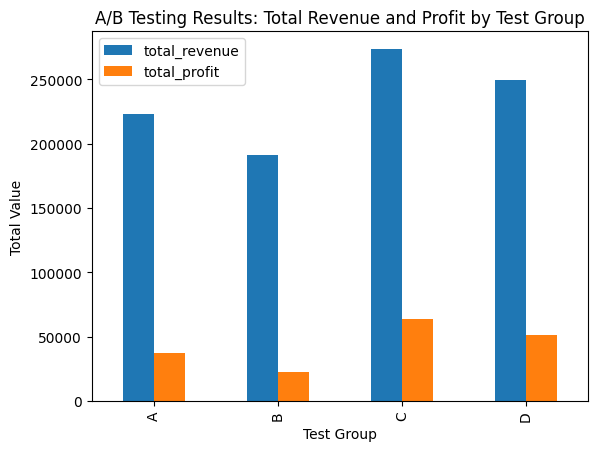

In [ ]:
# Plot total revenue and total profit for each test group
results[['total_revenue', 'total_profit']].plot(kind='bar')
plt.title("A/B Testing Results: Total Revenue and Profit by Test Group")
plt.xlabel("Test Group")
plt.ylabel("Total Value")
plt.show()


**Evaluating each price strategy on the complete dataset.**

Reasons for Applying Each Strategy on the Complete Dataset:

1. Holistic View: By applying each pricing strategy to the entire dataset, we can understand the overall impact of each strategy on revenue, profit, and quantity sold for all products. This ensures considering the dataset's full scope and not just segments of it.

2. Comparability: When evaluating all strategies across the complete dataset, we have a uniform baseline for comparison. Any variations in the results can be attributed directly to the pricing strategy and not to differences in the product groups or demand conditions.

3. Avoiding Bias: Randomly splitting the dataset and assigning different pricing strategies to each segment might introduce unintended bias. For example, some product segments could be more responsive to specific pricing strategies, skewing the results.

4. Testing Strategy Fit: Evaluating all pricing strategies on all products helps identify which strategies work best for specific types of products or under particular market conditions. This can guide future decisions on applying mixed strategies rather than sticking to one for all products.

In [ ]:
# Calculate revenue and profit for each strategy
strategies = ['cost_plus_price', 'competitor_based_price', 'dynamic_price', 'value_based_price']
for strategy in strategies:
    df1[f'{strategy}_revenue'] = df1[strategy] * df1['qty']
    df1[f'{strategy}_profit'] = (df1[strategy] - df1['cost_price']) * df1['qty']

# Summarize the results for each strategy
summary = df1[[f'{strategy}_revenue' for strategy in strategies] +
              [f'{strategy}_profit' for strategy in strategies] +
              ['qty']].sum()

print(summary)

cost_plus_price_revenue           915024.821248
competitor_based_price_revenue    805887.348236
dynamic_price_revenue             986862.046571
value_based_price_revenue         962271.258010
cost_plus_price_profit            152504.136875
competitor_based_price_profit      43366.663863
dynamic_price_profit              224341.362198
value_based_price_profit          199750.573637
qty                                 9700.750000
dtype: float64


Applying each strategy on complete dataset show similar results as in the case of A/B Testing on the dataset with Dynamic Pricing showing highest revenue and profit followed by Value based pricing

#Insights


1. Dynamic Pricing (Group C) Achieved the Highest Total Revenue and Profit

  Total Revenue: 273,479.53

  Total Profit: 63,683.67
  
  Average Quantity Sold: 14.88 units

  Interpretation:

  Dynamic pricing adjusts prices based on real-time demand fluctuations.
  The highest revenue and profit indicate that this strategy effectively maximized earnings by increasing prices during high-demand periods without significantly reducing the quantity sold.
  
  The average quantity sold remained high, suggesting that customers were willing to purchase despite price changes.
2. Value-Based Pricing (Group D) Also Performed Strongly

  Total Revenue: 249,608.87

  Total Profit: 51,227.33

  Average Quantity Sold: 15.30 units (highest among all groups)
  
  Interpretation:

  Value-based pricing sets prices according to the perceived value of the product to the customer.
  The high total revenue and profit, along with the highest average quantity sold, suggest that customers recognized and were willing to pay for the value offered.
  This strategy effectively leveraged product quality or brand reputation to enhance profitability.
3. Cost-Plus Pricing (Group A) Had Moderate Performance

  Total Revenue: 223,064.31

  Total Profit: 37,177.38
  
  Average Quantity Sold: 12.95 units (lowest among all groups)

  Interpretation:

  Cost-plus pricing involves adding a fixed markup to the cost price.
  While it ensures a consistent profit margin, it doesn't account for market demand or customer perception.
  The lower average quantity sold and moderate profit indicate that this strategy may not be as effective in maximizing sales or profits.

4. Competitor-Based Pricing (Group B) Resulted in the Lowest Revenue and Profit

  Total Revenue: 191,280.49
  
  Total Profit: 22,824.13
  
  Average Quantity Sold: 14.35 units

  Interpretation:

  Competitor-based pricing sets prices based on competitors' pricing strategies.
  Despite a relatively high average quantity sold, the total revenue and profit were the lowest.
  This suggests that matching or undercutting competitor prices may lead to lower profitability, possibly due to reduced margins.

5. Average Quantity Sold Insights

  The highest average quantity sold was in Group D (Value-Based Pricing), indicating strong customer demand at the set price points.

  Dynamic Pricing (Group C) also maintained a high average quantity sold while achieving the highest profit, showing that strategic price adjustments did not deter customers.


**Additional Insights**

* Demand Sensitivity:

  * Dynamic pricing's success indicates that customers are willing to accept price changes based on demand.
  * Understanding elasticity can further optimize dynamic pricing models.
* Perceived Value:

  * High performance of value-based pricing underscores the importance of product quality, brand reputation, and customer experience.
  * Investing in factors that enhance perceived value can justify higher prices.
* Profit Margins:

  * Despite higher average quantities sold in groups B, C, and D, profit margins vary significantly.
  * Focusing on strategies that enhance both sales volume and profit margins is key to overall profitability.
* Inventory Management:

  * Higher average quantities sold may impact inventory levels.
  * Ensure that supply chain and inventory management are aligned with pricing strategies to meet customer demand efficiently.

#Recommendations

1. Dynamic Pricing is the Most Profitable Strategy

  * Achieved the highest total revenue and profit.
  * Maintained a high average quantity sold.
  * **Recommendation**: Implement dynamic pricing to capitalize on demand fluctuations. This strategy can maximize profits without significantly impacting sales volume.
2. Value-Based Pricing Effectively Increases Sales Volume

  * Highest average quantity sold, indicating strong customer acceptance.
  * High total revenue and profit, second only to dynamic pricing.
  * **Recommendation**: Utilize value-based pricing for products with high customer perceived value. This can enhance both sales volume and profitability.
3. Cost-Plus Pricing Provides Stability but Limits Profitability

  * Ensures consistent margins but may not respond to market dynamics.
  * Lower average quantity sold suggests potential pricing misalignment with customer expectations.
  * **Recommendation**: Consider combining cost-plus pricing with market insights to adjust prices more strategically.
4. Competitor-Based Pricing May Lead to Lower Profits

  * Lowest total revenue and profit despite reasonable sales volume.
  * Potentially sacrifices profit margins to match competitors.
  * **Recommendation**: Relying solely on competitor prices may not be optimal. Incorporate unique value propositions or adjust pricing strategies to improve profitability.

**Overall Strategy**

  * **Hybrid Approach**: Consider a combination of dynamic and value-based pricing to leverage the strengths of both strategies.
  * **Customer Segmentation**: Tailor pricing strategies to different customer segments based on their price sensitivity and perceived value.
  * **Market Monitoring**: Continuously analyze market trends, demand patterns, and competitor actions to adjust pricing dynamically.


**Next Steps**

1. Detailed Analysis:

  * Perform product-level analysis to identify which products contribute most to revenue and profit under each strategy.
  * Analyze customer behavior and feedback to refine pricing strategies further.
2. Implementation Plan:

  * Pilot the preferred pricing strategies (dynamic and value-based) in select markets or product lines.
  * Monitor performance closely and adjust parameters as needed.
3. Technology and Infrastructure:

  * Invest in systems that support dynamic pricing, such as real-time data analytics and automated pricing tools.
  * Ensure that staff are trained to manage and optimize these systems effectively.
4. Risk Management:

  * Consider potential customer reactions to price fluctuations.
  * Develop communication strategies to maintain transparency and customer trust.
5. Long-Term Strategy:

  * Incorporate pricing strategy reviews into regular business planning.
  * Stay agile to adapt to changing market conditions, competition, and customer preferences.


By analyzing these results, it becomes evident that dynamic pricing and value-based pricing outperform cost-plus and competitor-based pricing in both revenue and profit while maintaining high sales volumes. Adopting these strategies could significantly enhance the company's financial performance and competitive positioning.